# SGPS BioStatistics
## Dimension reduction methods.
### Plotting a map of Europe given distances between cities
+ Distance file available from RMDS project:
    - [https://github.com/cheind/rmds/blob/master/examples/european_city_distances.csv](https://github.com/cheind/rmds/blob/master/examples/european_city_distances.csv)

In [13]:
import pandas as pd
import numpy as np
from sklearn import manifold
import matplotlib.pyplot as plt
# from adjustText import adjust_text
import seaborn as sns
sns.set()

In [14]:
# Get the data
dists = pd.read_csv("european_city_distances.csv", delimiter=';', index_col=0)
dists

,Barcelona,Belgrade,Berlin,Brussels,Bucharest,Budapest,Copenhagen,Dublin,Hamburg,Istanbul,...,Moscow,Munich,Paris,Prague,Rome,SaintPetersburg,Sofia,Stockholm,Vienna,Warsaw
Barcelona,0.00,1528.13,1497.61,1062.89,1968.42,1498.79,1757.54,1469.29,1471.78,2230.42,...,3006.93,1054.55,831.59,1353.90,856.69,2813.02,1745.55,2276.51,1347.43,1862.33
Belgrade,1528.13,0.00,999.25,1372.59,447.34,316.41,1327.24,2145.39,1229.93,809.48,...,1710.99,773.33,1445.70,738.10,721.55,1797.75,329.46,1620.96,489.28,826.66
Berlin,1497.61,999.25,0.00,651.62,1293.40,689.06,354.03,1315.16,254.51,1735.01,...,1607.99,501.97,876.96,280.34,1181.67,1319.62,1318.67,810.38,523.61,516.06
Brussels,1062.89,1372.59,651.62,0.00,1769.69,1131.52,766.67,773.20,489.76,2178.85,...,2253.26,601.87,261.29,721.08,1171.34,1903.66,1697.83,1280.88,914.81,1159.85
Bucharest,1968.42,447.34,1293.40,1769.69,0.00,639.77,1571.54,2534.72,1544.17,445.62,...,1497.56,1186.37,1869.95,1076.82,1137.38,1740.39,296.68,1742.25,855.32,946.12
Budapest,1498.79,316.41,689.06,1131.52,639.77,0.00,1011.31,1894.95,927.92,1064.76,...,1565.19,563.93,1247.61,443.26,811.11,1556.51,629.63,1316.59,216.98,545.29
Copenhagen,1757.54,1327.24,354.03,766.67,1571.54,1011.31,0.00,1238.38,287.97,2017.17,...,1558.52,838.00,1025.90,633.05,1529.69,1143.40,1635.54,521.68,868.87,667.80
Dublin,1469.29,2145.39,1315.16,773.20,2534.72,1894.95,1238.38,0.00,1073.36,2950.11,...,2792.41,1374.91,776.83,1465.61,1882.22,2314.19,2471.02,1626.56,1680.00,1823.72
Hamburg,1471.78,1229.93,254.51,489.76,1544.17,927.92,287.97,1073.36,0.00,1983.75,...,1779.93,610.17,744.63,492.25,1307.51,1414.16,1554.82,809.65,742.79,750.49
Istanbul,2230.42,809.48,1735.01,2178.85,445.62,1064.76,2017.17,2950.11,1983.75,0.00,...,1753.97,1582.16,2253.98,1507.55,1373.81,2099.29,502.61,2171.65,1273.88,1386.08


/Users/jpw/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


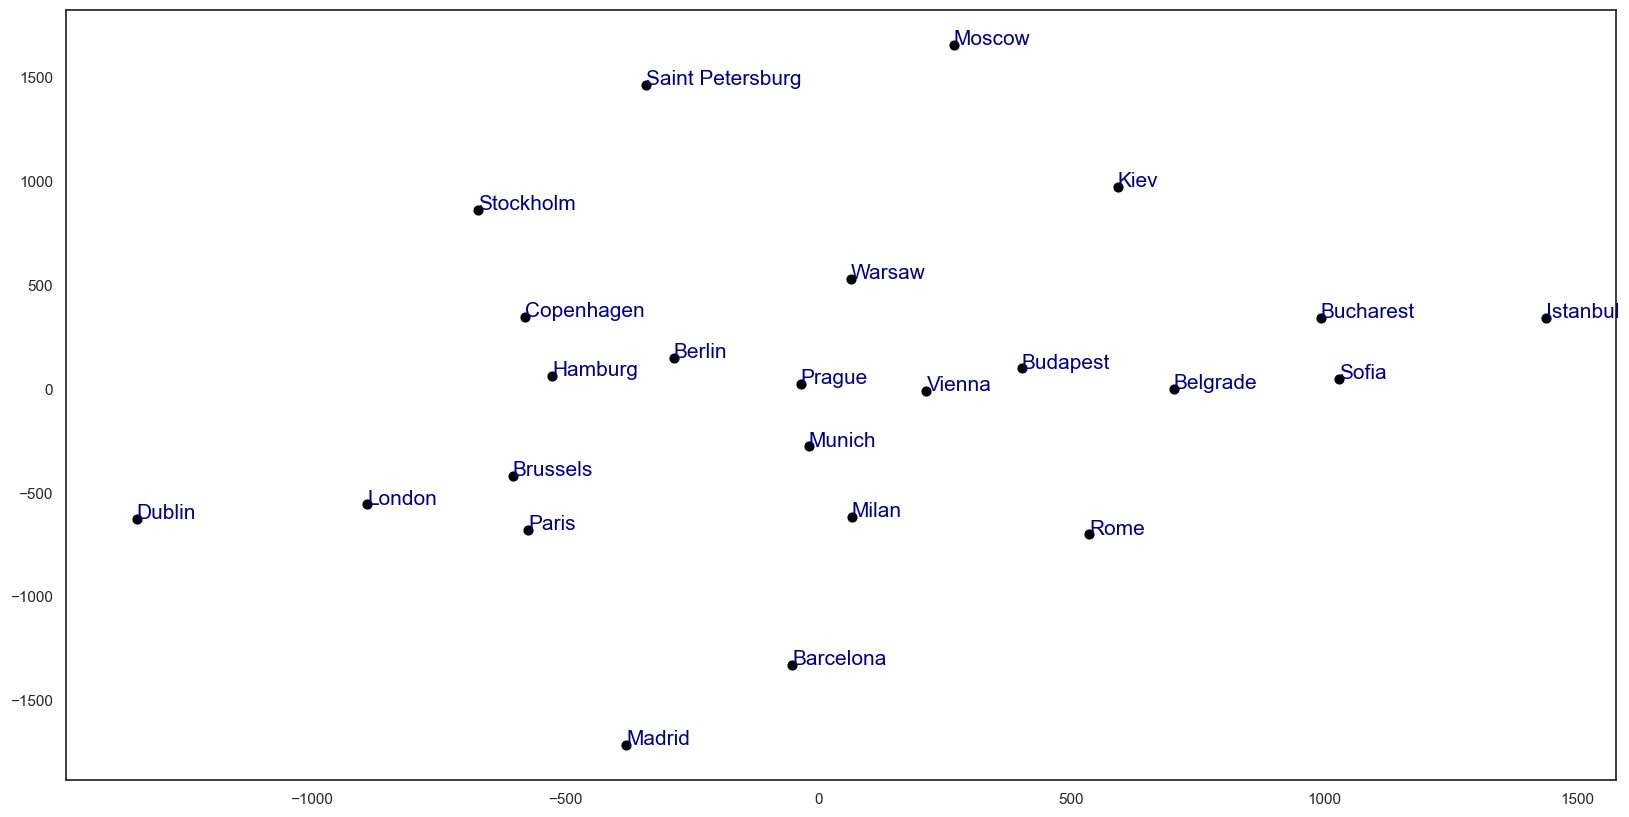

In [15]:
# Get the data in a easy to use matrix and labels
adist = np.array(dists)
cities = dists.index.values

# Caculate the coordinates in a 2D map
mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6) # In 2D, with distances already precomputed and fixed orientation
results = mds.fit(adist)

coords = results.embedding_

# Plot a 2D map of based on the distances from each other.
with sns.axes_style("white"):
    plt.figure(1,figsize=(20,10))
    plt.scatter(coords[:, 0], coords[:, 1], marker = 'o', color='black', s=40)
    texts = []
    for label, x, y in zip(cities, coords[:, 0], coords[:, 1]):
        texts.append(plt.text(x,y,label,size=15,color='darkblue'))
    # adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))
    plt.show()

### How about using genetic distances to map ethnicity

+ Firstly find genome positiions in your cohort that are informative about race:
    - Use the 1000 genome dataset to pick out positions with a minor allele frequency different between two of African, Asian or European populations (filtering out any multi allelic sites).
+ For these sites, calculate the Euclidean distance between your samples:
    - To calculate the distance at each position, for a pair of samples, if they are both share the same alleles, distance = 0; or share one allele, distance = 1; and if they share no alleles, distance = 2.
    - Square each the distance at each position, add them all together and take the square root of the answer.
    - This is used to plot a 2D map of genomic 'distance' between the samples. We can compare the reported ethnicity to the position on the map.

In [16]:
# Get the data in
genetic_distances = np.genfromtxt('genetic_distances.csv', delimiter=',')
recorded_ethnicities = open('recorded_ethnicities.txt').read().splitlines()

# Define the markers and colours for each recorded ethnicity
ethnicities = {
'Australia': ['Australian', 'd', 'blue'], 
'Germany': ['German', 's', 'blue'], 
'Poland': ['Poland', '1', 'blue'], 
'Russia': ['Russia', 'p', 'blue'], 
'Ukraine': ['Ukraine', '3', 'blue'], 
'Yemen': ['Yemen', '4', 'red'], 
'Korea South': ['S_Korea', 'D', 'red'], 
'Singapore': ['Singapore', '|', 'red'], 
'Vietnam': ['Vietnam', '>', 'red'], 
'Canada_Wh': ['White_Canadian', '^', 'blue'], 'Canada_As': ['Asian_Canadian', '^', 'red'],  'Canada_NK': ['Unknown_Canadian', '^', 'black'], 
'USA_Af': ['African_American','o','green'], 'USA_As': ['Asian_American','o','red'], 'USA_Wh': ['White_American','o','blue'], 'USA_La': ['Latin_American','o','gold'], 'USA_NK': ['Unknown_American', 'o', 'black'], 
'Unknown_Af': ['African_Unknown','x','green'], 'Unknown_As': ['Asian_Unknown','x','red'], 'Unknown_Wh': ['White_Unknown','x','blue'], 'Unknown_La': ['Latin_Unknown','x','gold'], 'Unknown_PI': ['Pacific_Islander_Unknown','x','purple'], 'Unknown_NK': ['Unknown_Unknown', 'x', 'black']}

# OK Calculation time
mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)
results = mds.fit(genetic_distances)

coords = results.embedding_

/Users/jpw/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


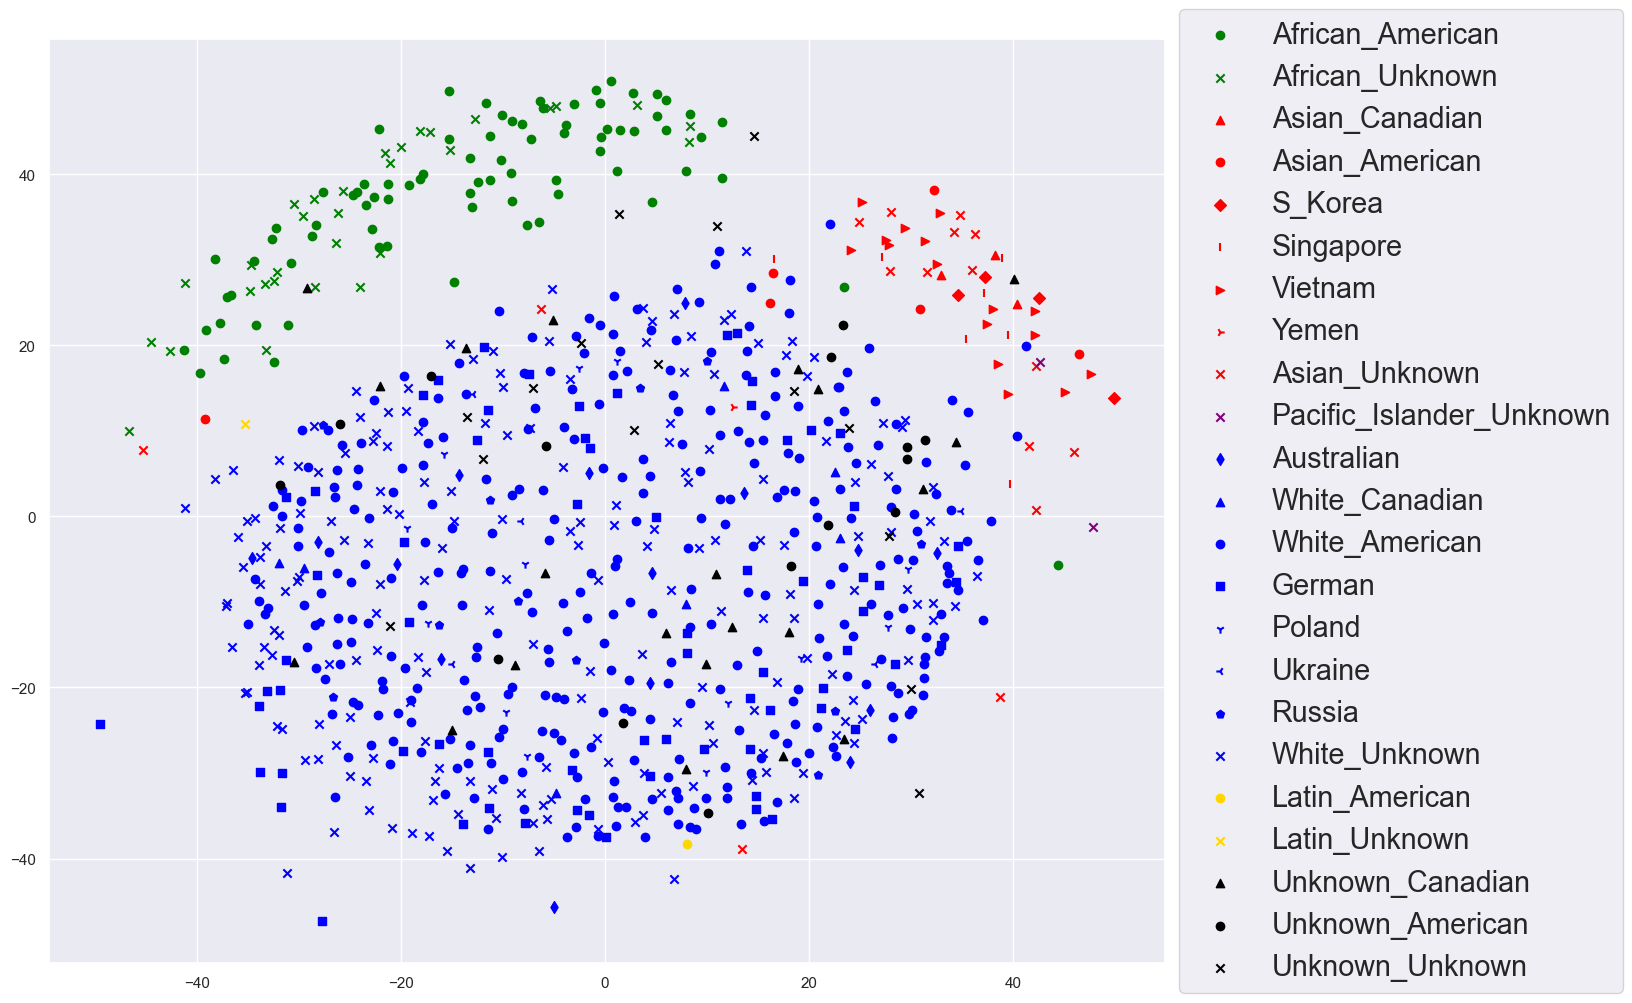

In [17]:
# Get the order to plot it in
nationalities = []
for item in ethnicities:
    nationalities.append(item)

plotting_dict = {}
for item in nationalities:
    plotting_dict[item] = []

for k,item in enumerate(recorded_ethnicities):
    plotting_dict[item].append(k)

correct_order = []
for key in plotting_dict:
    correct_order.append(key)
correct_order = list(set(correct_order))
correct_order
# correct_order.sort()

# Plot a 2D map of genetic distances
with sns.axes_style("darkgrid"):
    fig = plt.figure(1,figsize=(18, 12))
    ax = plt.subplot(111)
    
    correct_order = ['USA_Af', 'Unknown_Af', 'Canada_As', 'USA_As', 'Korea South', 'Singapore', 'Vietnam', 'Yemen', 'Unknown_As', 'Unknown_PI', 'Australia', 'Canada_Wh', 'USA_Wh', 'Germany', 'Poland', 'Ukraine', 'Russia', 'Unknown_Wh', 'USA_La', 'Unknown_La', 'Canada_NK', 'USA_NK', 'Unknown_NK']
    
    for key in correct_order:
        if key in ethnicities:
             plt.scatter(coords[plotting_dict[key], 0], coords[plotting_dict[key], 1], c=ethnicities[key][2], marker=ethnicities[key][1],label=ethnicities[key][0])
    
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * .8, box.height])
    ax.legend(loc = 'center left', fontsize='xx-large',bbox_to_anchor=(1, .5))

## Working with gene expression data
## Looking at dimension reduction, using principal component analysis

In this dataset we have:
    - 228 donors, ~15000 gene expression values

The gene expression is from the innate immune cells, monocytes under 4 conditions:
    - Untreated, as a control.
    - Treated with inteferon-gamma (IFN) for 24 hours – a good model for viral infections.
    - Treated with Lipopolysaccharide (LPS) for 2 hours - LPS is a major component of the outer wall of gram negative bacteria, which our body registers as a toxin and elicits a strong immune response.
    - Treated with Lipopolysaccharide (LPS) for 24 hours.
    
So we have a dataset for 912 samples (from 228 donors for 4 conditions each), gene expression data for ~15,000 genes. 

How to understand this dataset?

No doubt there is high redundancy amongst the samples, so reducing them from ~15000 to a smaller number could be really helpful into interpreting the dataset (in this case for projecting the gene expression and genes into one value for each sample for each principal component).



In [18]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.decomposition import PCA
sns.set_context("poster")

In [19]:
# Get the data in
expr_all = pd.read_csv('monocyte_all_expression.csv', index_col=0)

In [20]:
# See what it looks like
expr_all


,RERE,PHF7,BCAP29,PAPD4,SDS,ZNF768,F3,LIN52,SLC9A1,CD164,...,GRHPR,CHRNB1,TBC1D4,C4orf48,BX107598,UGCGL1.1,VPS72,AW296529,CC2D1A,ARHGAP30.2
2_Untreated,9.790441,7.300656,8.956566,11.037554,6.983523,7.555529,7.147966,7.577059,9.535068,8.424032,...,8.791211,8.312185,7.833375,8.225152,7.151056,8.676772,8.410220,7.211639,7.604288,8.971266
3_Untreated,8.923455,7.284492,8.740269,10.457396,7.819850,7.477889,7.816232,7.367911,9.416581,9.101542,...,9.293750,8.206373,7.504186,8.665725,7.155556,7.899655,8.499364,7.115580,7.807368,8.279488
60_Untreated,9.865382,7.070042,8.597482,10.510448,7.272814,7.441528,7.090109,7.109993,10.013401,8.572141,...,9.060916,8.253385,7.889364,8.503173,7.156419,8.239214,8.295041,7.204468,7.731997,9.018779
61_Untreated,9.467094,7.390813,8.934205,10.738276,6.859392,7.528432,6.843392,7.524393,9.936250,8.428560,...,9.062515,8.364058,7.865590,8.430069,7.131658,8.274826,8.332870,7.179752,7.530734,9.126754
62_Untreated,9.441596,7.242676,8.592481,10.648097,7.462482,7.374076,7.545064,7.134254,10.137927,8.276697,...,9.185479,8.037088,7.699464,8.743046,7.188381,7.989197,8.433115,7.434024,7.756521,8.884357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426_LPS24h,9.742062,7.059988,8.657487,10.805615,5.304757,7.734733,6.871390,7.228963,11.060412,8.532747,...,8.478067,8.202240,7.467128,8.352854,7.242027,7.940360,8.683181,7.258820,7.810266,9.251630
429_LPS24h,10.192514,7.236008,8.676955,10.871828,5.051904,7.545954,6.913059,7.279411,10.805543,8.470332,...,8.466433,8.291509,7.430134,8.253408,7.182041,8.106536,8.723068,7.339259,7.620997,9.446402
430_LPS24h,9.244622,7.174317,8.897469,10.797612,5.579165,7.473409,7.008846,7.205574,10.703488,8.823769,...,8.589745,8.162072,7.529747,8.510888,7.243233,8.073605,8.273130,7.132539,7.756732,8.964569
431_LPS24h,9.625692,7.160371,8.918702,10.878961,5.737182,7.622804,7.145538,7.159781,10.566232,8.520005,...,8.821055,8.202816,7.367815,8.306160,7.284322,8.147883,8.354880,7.187291,7.769379,8.937714


In [21]:
# Get the treatment for each sample
y = []
for item in expr_all.index.values:
    if 'Untreated' in item:
        y.append(0)
    elif 'IFN' in item:
        y.append(1)
    elif 'LPS2h' in item:
        y.append(2)
    elif 'LPS24h' in item:
        y.append(3)
    else:
        print('Error: Data from non-recognisable experiment')
y = np.array(y)

labels = ['Untreated', 'IFN', 'LPS 2h', 'LPS 24h']
colours = ['red', 'green', 'blue', 'gold']

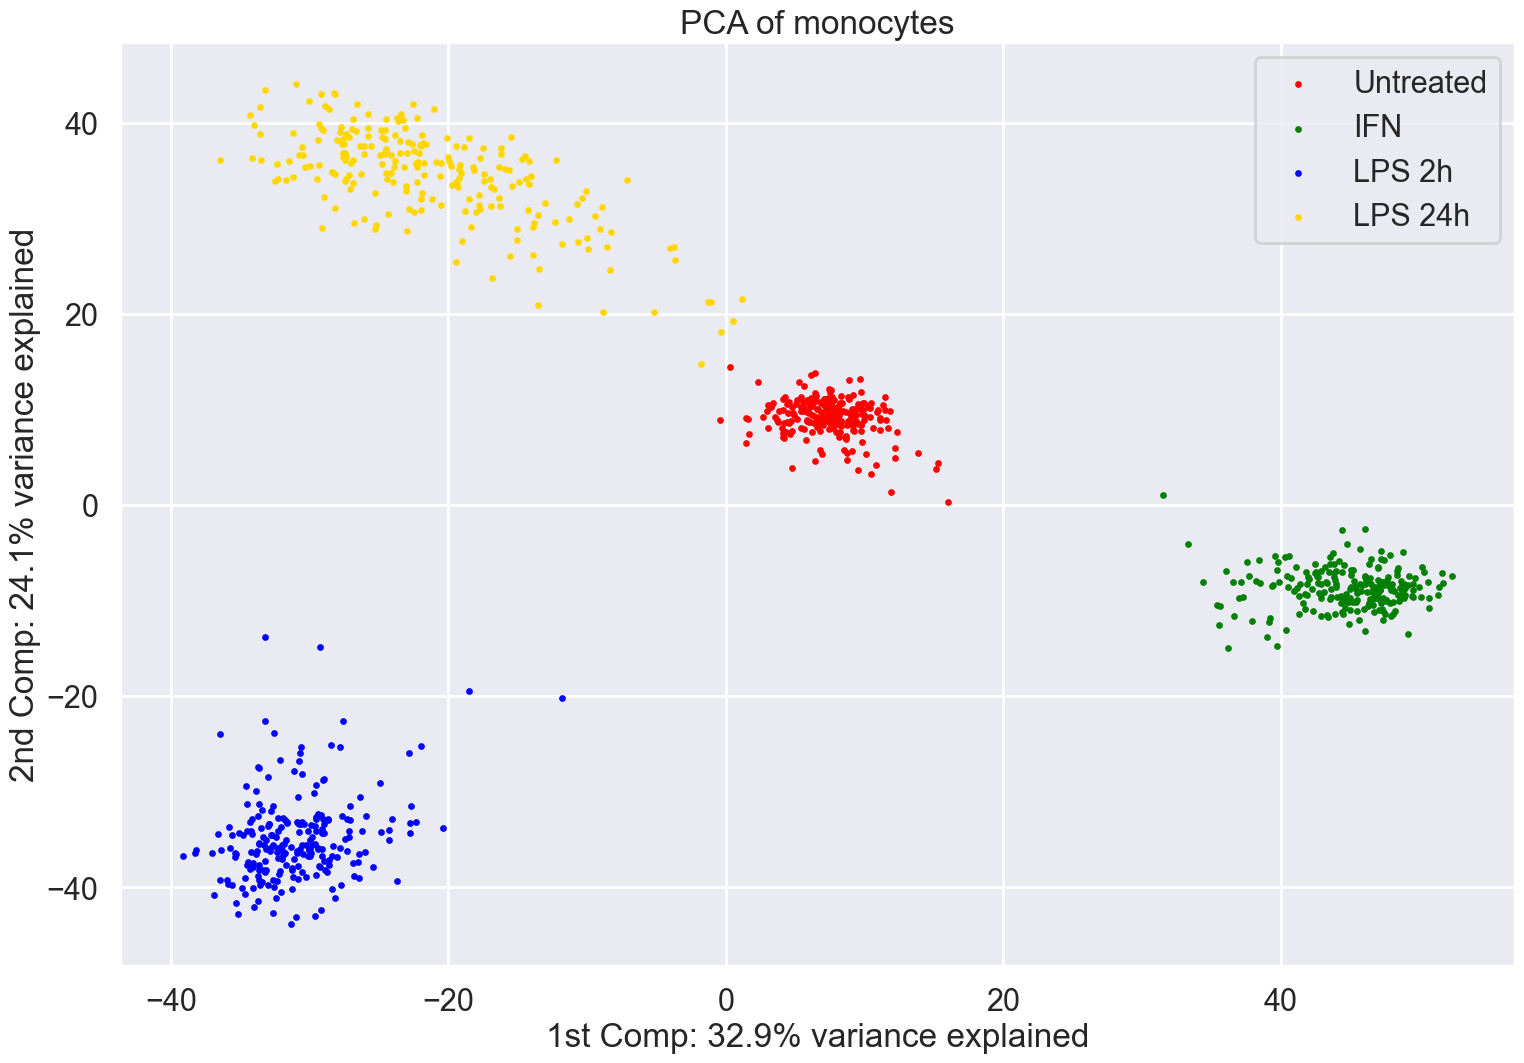

In [22]:
# PCA of component 1 and 2
pca = PCA()
X_pca = pca.fit_transform(expr_all)
var_expl = pca.explained_variance_ratio_
r_col = []
fig = plt.figure(figsize=(18,12))
for colour, i, target_name in zip(colours, range(len(labels)), labels):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], s= 8, color=colour, lw=2, label=target_name)

plt.title("PCA of monocytes")
plt.legend(loc=1, shadow=False)
# plt.axis([-4, 4, -1.5, 1.5])
plt.xlabel('1st Comp: ' + str(round(var_expl[0]*100,1)) + '% variance explained')
plt.ylabel('2nd Comp: ' + str(round(var_expl[1]*100,1)) + '% variance explained')
fig.savefig('PCA_Extreme_Data_comp1_comp2.pdf')
plt.show()

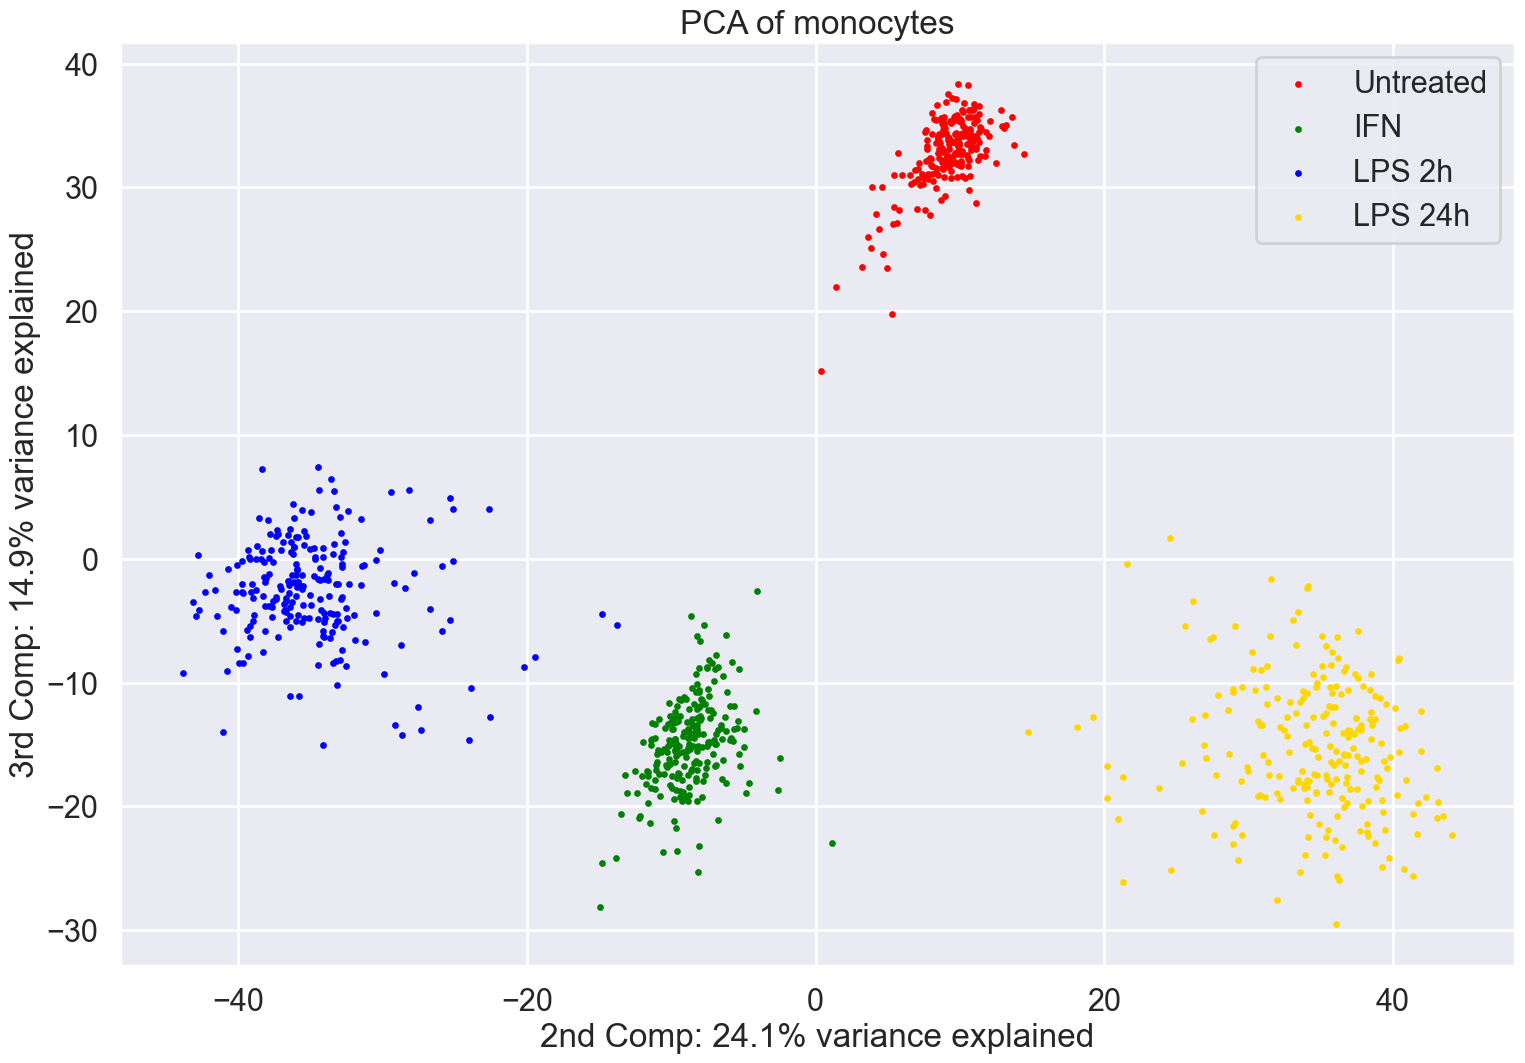

In [23]:
# PCA of component 2 and 3
fig = plt.figure(figsize=(18,12))
for colour, i, target_name in zip(colours, range(len(labels)), labels):
    plt.scatter(X_pca[y == i, 1], X_pca[y == i, 2], s= 8, color=colour, lw=2, label=target_name)

plt.title("PCA of monocytes")
plt.legend(loc=1, shadow=False)
# plt.axis([-4, 4, -1.5, 1.5])
plt.xlabel('2nd Comp: ' + str(round(var_expl[1]*100,1)) + '% variance explained')
plt.ylabel('3rd Comp: ' + str(round(var_expl[2]*100,1)) + '% variance explained')
fig.savefig('PCA_Extreme_Data_comp2_comp3.pdf')
plt.show()

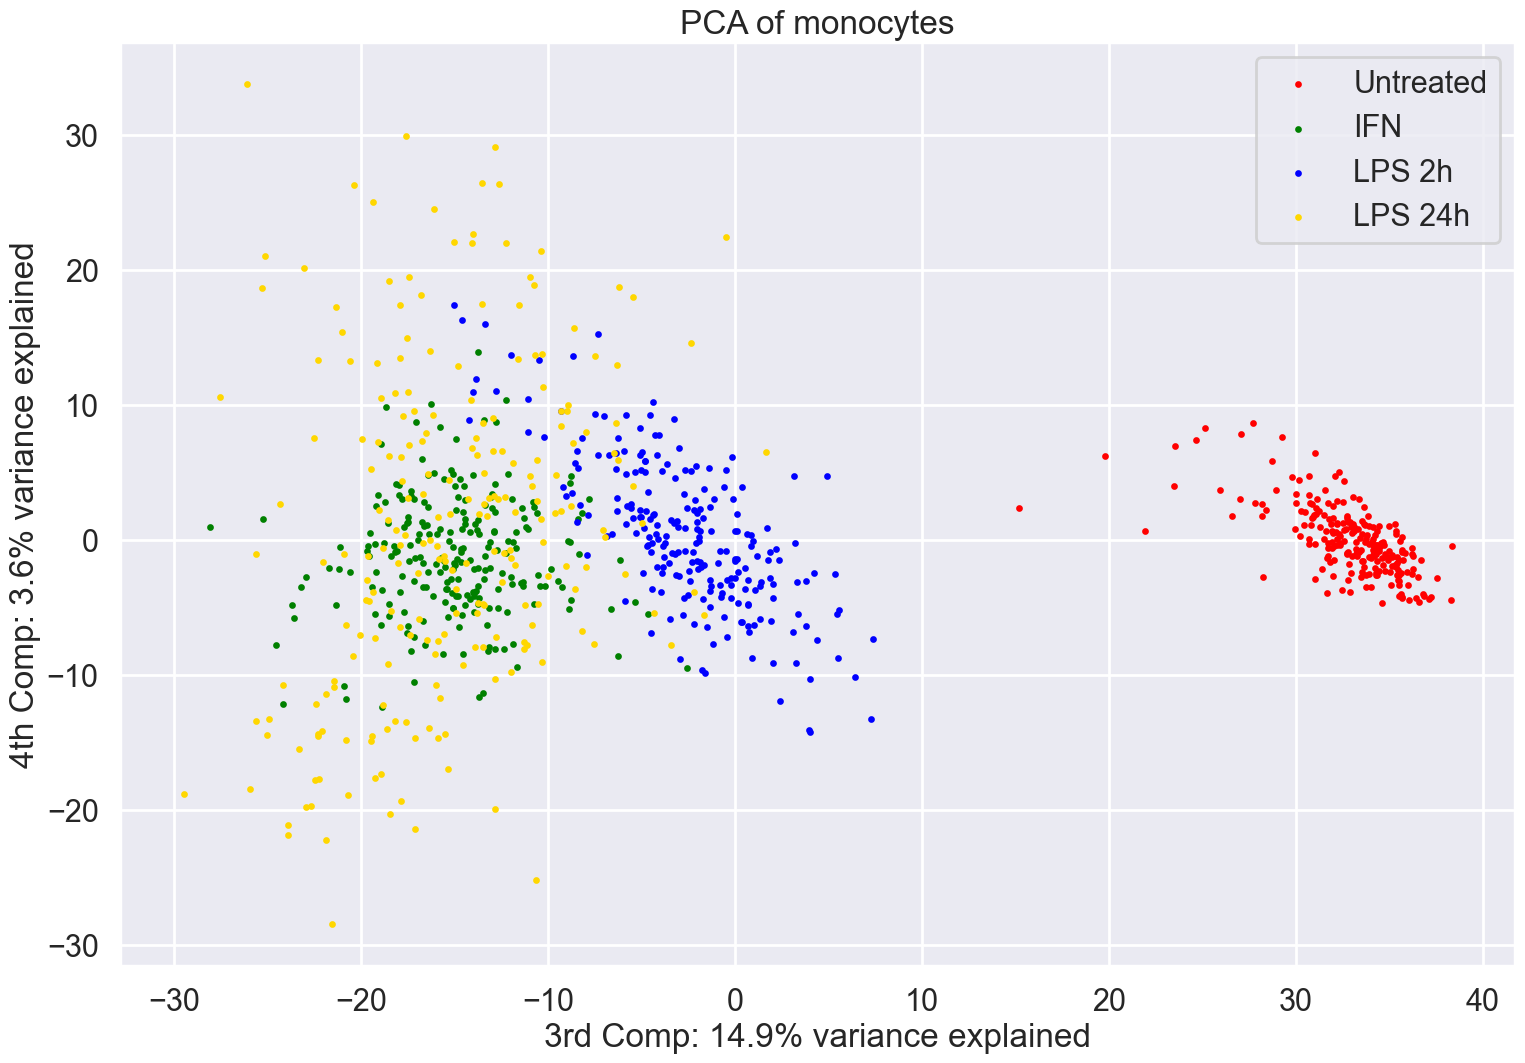

In [24]:
# PCA of component 3 and 4
fig = plt.figure(figsize=(18,12))
for colour, i, target_name in zip(colours, range(len(labels)), labels):
    plt.scatter(X_pca[y == i, 2], X_pca[y == i, 4], s= 8, color=colour, lw=2, label=target_name)

plt.title("PCA of monocytes")
plt.legend(loc=1, shadow=False)
# plt.axis([-4, 4, -1.5, 1.5])
plt.xlabel('3rd Comp: ' + str(round(var_expl[2]*100,1)) + '% variance explained')
plt.ylabel('4th Comp: ' + str(round(var_expl[3]*100,1)) + '% variance explained')
fig.savefig('PCA_Extreme_Data_comp2_comp3.pdf')
plt.show()

### Clustering the data

From the PCA (well for the first-  three components), we can see a good separation between the four different treatments of the cells. Can we use clustering methods to fully classify them?

Read through this tutorial - https://realpython.com/k-means-clustering-python/ and have a go at clustering the PCA data.

Instead of relying on th PCA, can we use clustering methods on all the data to fully classify them?